# Tutorial: `hsio`

## Sample data
Sample imagery captured from a [Resonon](https://resonon.com/) Pika II VIS-NIR line scanning imager and ancillary sample files can be downloaded from this [link](https://drive.google.com/drive/folders/1KpOBB4-qghedVFd8ukQngXNwUit8PFy_?usp=sharing).

Before trying this tutorial on your own machine, please download the [sample files](https://drive.google.com/drive/folders/1KpOBB4-qghedVFd8ukQngXNwUit8PFy_?usp=sharing) and place into a local directory of your choosing (and do not change the file names). Indicate the location of your sample files by modifying `data_dir`:

In [1]:
data_dir = r'F:\\nigo0024\Documents\hs_process_demo'

***

## Confirm your environment

Before trying the tutorials, be sure `hs_process` and its dependencies are [properly installed](installation.html#). If you installed in a *virtual environment*, first check we are indeed using the Python instance that was installed with the virtual environment:

In [2]:
import sys

print('Python install location: {0}'.format(sys.executable))

Python install location: C:\Users\nigo0024\AppData\Local\Continuum\anaconda3\envs\spec\python.exe


The *spec* folder that contains `python.exe` tells me that the activated Python instance is indeed in the `spec` environment, just as I intend. If you created a virtual environment, but your `python.exe` is not in the `envs\spec` directory, you either did not properly create your virtual environment or you are not pointing to the correct Python installation in your IDE (e.g., Spyder, Jupyter notebook, etc.).  

***

## `hsio.read_cube`
Reads in a hyperspectral datacube using the [Spectral Python](http://www.spectralpython.net/) package. [[API]](api/hs_process.hsio.html#hs_process.hsio.read_cube)

Load and initialize `hsio`

In [3]:
import os
from hs_process import hsio

fname_hdr = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio()  # initialize an instance of the hsio class (note there are no required parameters)

Load datacube using ``hsio.read_cube``

In [4]:
io.read_cube(fname_hdr)
io.spyfile

	Data Source:   'F:\\nigo0024\Documents\hs_process_demo\Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip'
	# Rows:            617
	# Samples:        1300
	# Bands:           240
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32

Check `name_long`, `name_short`, and `name_plot` values derived from the filename

In [5]:
print('name_long: {0}'.format(io.name_long))
print('name_short: {0}'.format(io.name_short))
print('name_plot: {0}'.format(io.name_plot))

name_long: -Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum
name_short: Wells_rep2_20180628_16h56m_pika_gige_7
name_plot: 7


***

##  `hsio.read_spec`
Reads in a hyperspectral spectrum file using the using the [Spectral Python](http://www.spectralpython.net/) package. [[API]](api/hs_process.hsio.html#hs_process.hsio.read_spec)


Load and initialize `hsio`

In [6]:
from hs_process import hsio

fname_hdr_spec = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7_plot_611-cube-to-spec-mean.spec.hdr')
io = hsio()  # initialize an instance of the hsio class (note there are no required parameters)

Load datacube using ``hsio.read_cube``

In [7]:
io.read_spec(fname_hdr_spec)
io.spyfile_spec

	Data Source:   'F:\\nigo0024\Documents\hs_process_demo\Wells_rep2_20180628_16h56m_pika_gige_7_plot_611-cube-to-spec-mean.spec'
	# Rows:              1
	# Samples:           1
	# Bands:           240
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32

Check `name_long`, `name_short`, and `name_plot` values derived from the filename

In [8]:
print('name_long: {0}'.format(io.name_long))
print('name_short: {0}'.format(io.name_short))
print('name_plot: {0}'.format(io.name_plot))

name_long: -cube-to-spec-mean
name_short: Wells_rep2_20180628_16h56m_pika_gige_7_plot_611
name_plot: 611


***

## `hsio.set_io_defaults`
Sets any of the ENVI file writing parameters to `hsio`; if any parameter is left unchanged from its default, it will remain as-is (i.e., it will not be set). [[API]](api/hs_process.hsio.html#hs_process.hsio.set_io_defaults)

Load and initialize `hsio`

In [9]:
from hs_process import hsio

io = hsio()  # initialize an instance of the hsio class

Check `defaults.envi_write`

In [10]:
io.defaults.envi_write

{'dtype': numpy.float32,
 'force': False,
 'ext': '',
 'interleave': 'bip',
 'byteorder': 0}

Modify `force` parameter and recheck `defaults.envi_write`

In [11]:
io.set_io_defaults(force=True)
io.defaults.envi_write

{'dtype': numpy.float32,
 'force': True,
 'ext': '',
 'interleave': 'bip',
 'byteorder': 0}

***

## `hsio.show_img`
Displays a datacube as a 3-band RGB image using [Matplotlib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html#). [[API]](api/hs_process.hsio.html#hs_process.hsio.show_img)

Load `hsio` and `spatial_mod` modules

In [12]:
from hs_process import hsio # load hsio
from hs_process import spatial_mod # load spatial mod

Load the datacube using `hsio.read_cube`

In [13]:
fname_hdr = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio()  # initialize an instance of the hsio class
io.read_cube(fname_hdr)

Perform simple spatial cropping via `spatial_mod.crop_single`

In [14]:
my_spatial_mod = spatial_mod(io.spyfile)  # initialize spatial_mod instance to crop the image
array_crop, metadata = my_spatial_mod.crop_single(pix_e_ul=250, pix_n_ul=100, crop_e_m=8, crop_n_m=3)

Show an RGB render of the cropped image using `hsio.show_img`

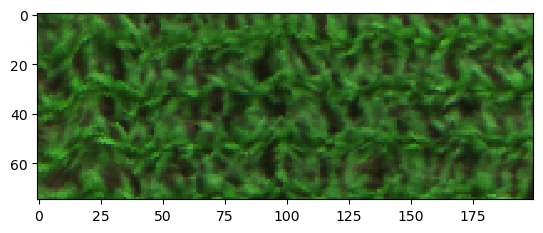

In [15]:
io.show_img(array_crop)

***

## `hsio.write_cube`
Wrapper function that accesses the [Spectral Python](http://www.spectralpython.net/) package to save a datacube to file. [[API]](api/hs_process.hsio.html#hs_process.hsio.write_cube)

Load `hsio` and `spatial_mod` modules

In [16]:
from hs_process import hsio  # load hsio
from hs_process import spatial_mod  # load spatial mod

fname_hdr_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio()  # initialize the hsio class
io.read_cube(fname_hdr_in)

Perform simple spatial cropping via `spatial_mod.crop_single` to generate a new datacube.

In [17]:
my_spatial_mod = spatial_mod(io.spyfile)  # initialize spatial_mod instance to crop the image
array_crop, metadata = my_spatial_mod.crop_single(pix_e_ul=250, pix_n_ul=100, crop_e_m=8, crop_n_m=3)

Save the datacube using `hsio.write_cube`.

In [18]:
fname_hdr = os.path.join(data_dir, 'hsio', 'Wells_rep2_20180628_16h56m_pika_gige_7-hsio-write-cube-cropped.bip.hdr')
if not os.path.isdir(os.path.dirname(fname_hdr)):  # create a new folder named "hsio" if it does not exist
    os.mkdir(os.path.dirname(fname_hdr))
io.write_cube(fname_hdr, array_crop, metadata=metadata)

Saving F:\nigo0024\Documents\hs_process_demo\hsio\Wells_rep2_20180628_16h56m_pika_gige_7-hsio-write-cube-cropped.bip


Load the datacube into Spectronon for visualization:
![write_cube](../.././docs/source/img/utilities/write_cube.png)

***

## `hsio.write_spec`
Wrapper function that accesses the [Spectral Python](http://www.spectralpython.net/) package to save a single spectra to file. [[API]](api/hs_process.hsio.html#hs_process.hsio.write_spec)

Load and initialize `hsio`

In [19]:
from hs_process import hsio # load hsio

fname_hdr_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio()  # initialize the hsio class (note there are no required parameters)
io.read_cube(fname_hdr_in)

Calculate spectral mean via `hstools.mean_datacube`

In [20]:
spec_mean, spec_std, _ = io.tools.mean_datacube(io.spyfile)
fname_hdr_spec = os.path.join(data_dir, 'hsio', 'Wells_rep2_20180628_16h56m_pika_gige_7-mean.spec.hdr')

Save the new spectra to file via `hsio.write_spec`

In [21]:
io.write_spec(fname_hdr_spec, spec_mean, spec_std)

Saving F:\nigo0024\Documents\hs_process_demo\hsio\Wells_rep2_20180628_16h56m_pika_gige_7-mean.spec


Open *Wells_rep2_20180628_16h56m_pika_gige_7-mean.spec* in *Spectronon* for visualization:
![write_spec](../.././docs/source/img/utilities/write_spec.png)

***

## `hsio.write_tif`
Wrapper function that accesses the [GDAL Python package](https://pypi.org/project/GDAL/) to save a small datacube subset (i.e., three bands or less) to file. [[API]](api/hs_process.hsio.html#hs_process.hsio.write_tif)

Load and initialize `hsio`

In [22]:
from hs_process import hsio  # load hsio

fname_hdr_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio()  # initialize the hsio class
io.read_cube(fname_hdr_in)

Save an RGB render of the datacube to file via `hsio.write_tif`

Either `projection_out` is `None` or `geotransform_out` is `None` (or both are). Retrieving projection and geotransform information by loading `hsio.fname_in` via GDAL. Be sure this is appropriate for the data you are trying to write.





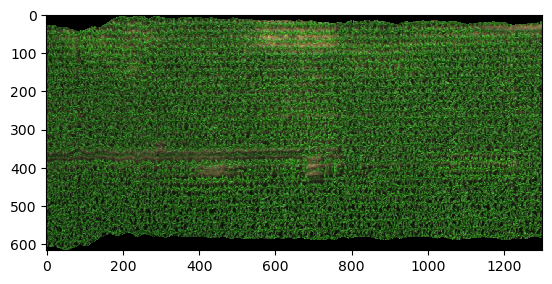

In [23]:
fname_tif = os.path.join(data_dir, 'hsio', 'Wells_rep2_20180628_16h56m_pika_gige_7.tif')
io.write_tif(fname_tif, spyfile=io.spyfile, fname_in=fname_hdr_in)

Open *Wells_rep2_20180628_16h56m_pika_gige_7.tif* in *QGIS* with the plot boundaries overlaid:
![write_tif](../.././docs/source/img/utilities/write_tif_qgis.png)